**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import numpy as np
ana_fitness = FitnessAnalysis('fitness')

c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\leond\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [2]:
ana_fitness.wtl_1v1

win  tie  \
metric        config.fitness_function_1 config.fitness_function_2             
test.accuracy accuracy                  f1_score                     4    6   
              sigmoid_rmse              accuracy                     3    7   
                                        f1_score                     5    5   
                                        weighted_sigmoid_rmse        3    7   
              weighted_sigmoid_rmse     accuracy                     1    5   
                                        f1_score                     3    5   
test.f1_score accuracy                  f1_score                     0    9   
              sigmoid_rmse              accuracy                     3    7   
                                        f1_score                     3    6   
                                        weighted_sigmoid_rmse        1    6   
              weighted_sigmoid_rmse     accuracy                     4    6   
                                        f1_score                     4    6   
test.roc_auc  accuracy                  f1_score                     1    7   
              sigmoid_rmse              accuracy                     6    4   
                                        f1_score                     4    6   
                                        weighted_sigmoid_rmse        2    7   
              weighted_sigmoid_rmse     accuracy                     7    3   
                                        f1_score                     4    6   

                                                                   loss  
metric        config.fitness_function_1 config.fitness_function_2        
test.accuracy accuracy                  f1_score                      0  
              sigmoid_rmse              accuracy                      0  
                                        f1_score                      0  
                                        weighted_sigmoid_rmse         0  
              weighted_sigmoid_rmse     accuracy                      4  
                                        f1_score                      2  
test.f1_score accuracy                  f1_score                      1  
              sigmoid_rmse              accuracy                      0  
                                        f1_score                      1  
                                        weighted_sigmoid_rmse         3  
              weighted_sigmoid_rmse     accuracy                      0  
                                        f1_score                      0  
test.roc_auc  accuracy                  f1_score                      2  
              sigmoid_rmse              accuracy                      0  
                                        f1_score                      0  
                                        weighted_sigmoid_rmse         1  
              weighted_sigmoid_rmse     accuracy                      0  
                                        f1_score                      0

In [3]:
ana_fitness.wtl_agg

,metric,config.fitness_function_1,win,tie,loss,rank
0,test.accuracy,accuracy,8,18,4,2.30
1,test.accuracy,f1_score,2,16,12,3.00
2,test.accuracy,sigmoid_rmse,11,19,0,1.95
3,test.accuracy,weighted_sigmoid_rmse,4,17,9,2.75
4,test.f1_score,accuracy,0,22,8,2.90
5,test.f1_score,f1_score,2,21,7,2.75
6,test.f1_score,sigmoid_rmse,7,19,4,2.35
7,test.f1_score,weighted_sigmoid_rmse,11,18,1,2.00
8,test.roc_auc,accuracy,1,14,15,3.20
9,test.roc_auc,f1_score,2,19,9,2.85


In [4]:
ana_fitness.wtl_detailed

,dataset_name,config.fitness_function_1,metric,win,tie,loss,sum,rank
0,auction,accuracy,test.accuracy,2,0,1,2.0,2.0
1,auction,accuracy,test.f1_score,0,2,1,1.0,3.0
2,auction,accuracy,test.roc_auc,0,0,3,0.0,4.0
3,auction,f1_score,test.accuracy,0,1,2,0.5,3.5
4,auction,f1_score,test.f1_score,0,2,1,1.0,3.0
...,...,...,...,...,...,...,...,...
115,wisconsin,sigmoid_rmse,test.f1_score,0,3,0,1.5,2.5
116,wisconsin,sigmoid_rmse,test.roc_auc,1,2,0,2.0,2.0
117,wisconsin,weighted_sigmoid_rmse,test.accuracy,0,3,0,1.5,2.5
118,wisconsin,weighted_sigmoid_rmse,test.f1_score,0,3,0,1.5,2.5


<span style="color:#3949ab;">&#9632;  RMSE</span>
<span style="color:#1e88e5;">&#9632; WRMSE</span>
<span style="color:#fb8c00;">&#9632;  Accuracy</span>
<span style="color:#ffb300;">&#9632;  F1-Score</span>

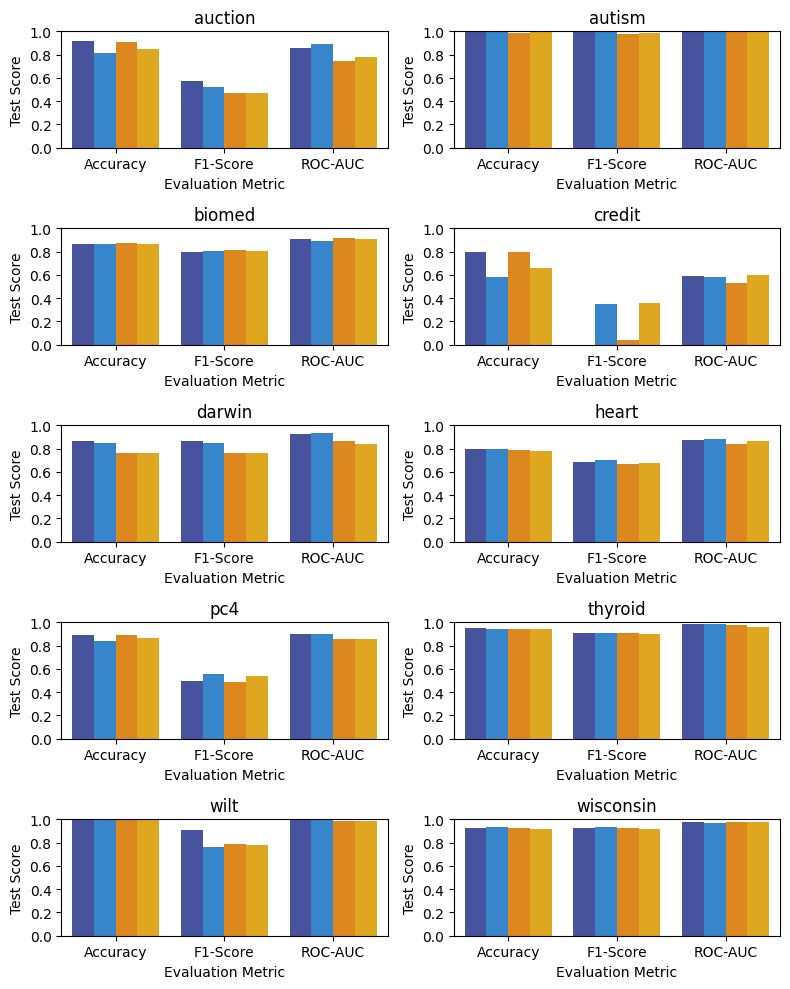

In [5]:
plot_performance_barplot(ana_fitness.best_config_results_median.rename(columns= {'test.accuracy': 'Accuracy', 'test.f1_score': 'F1-Score', 'test.roc_auc': 'ROC-AUC'}), ['Accuracy', 'F1-Score', 'ROC-AUC'], groupby='fitness_function', palette =['#3949ab', '#1e88e5' , '#fb8c00','#ffb300'])

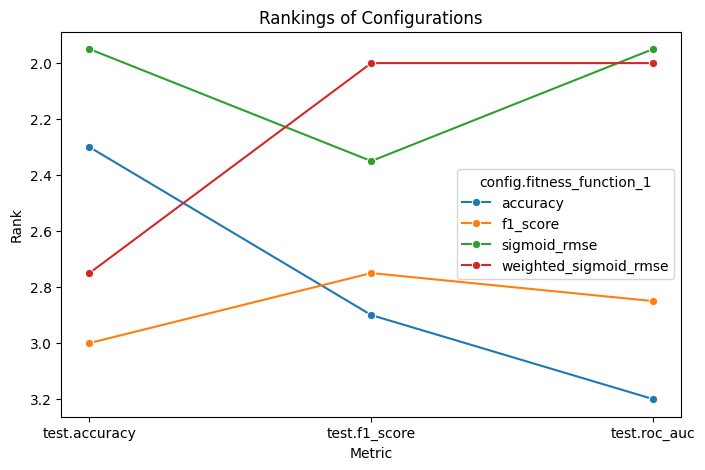

In [6]:
plot_ranks(ana_fitness.wtl_agg, 'config.fitness_function_1')

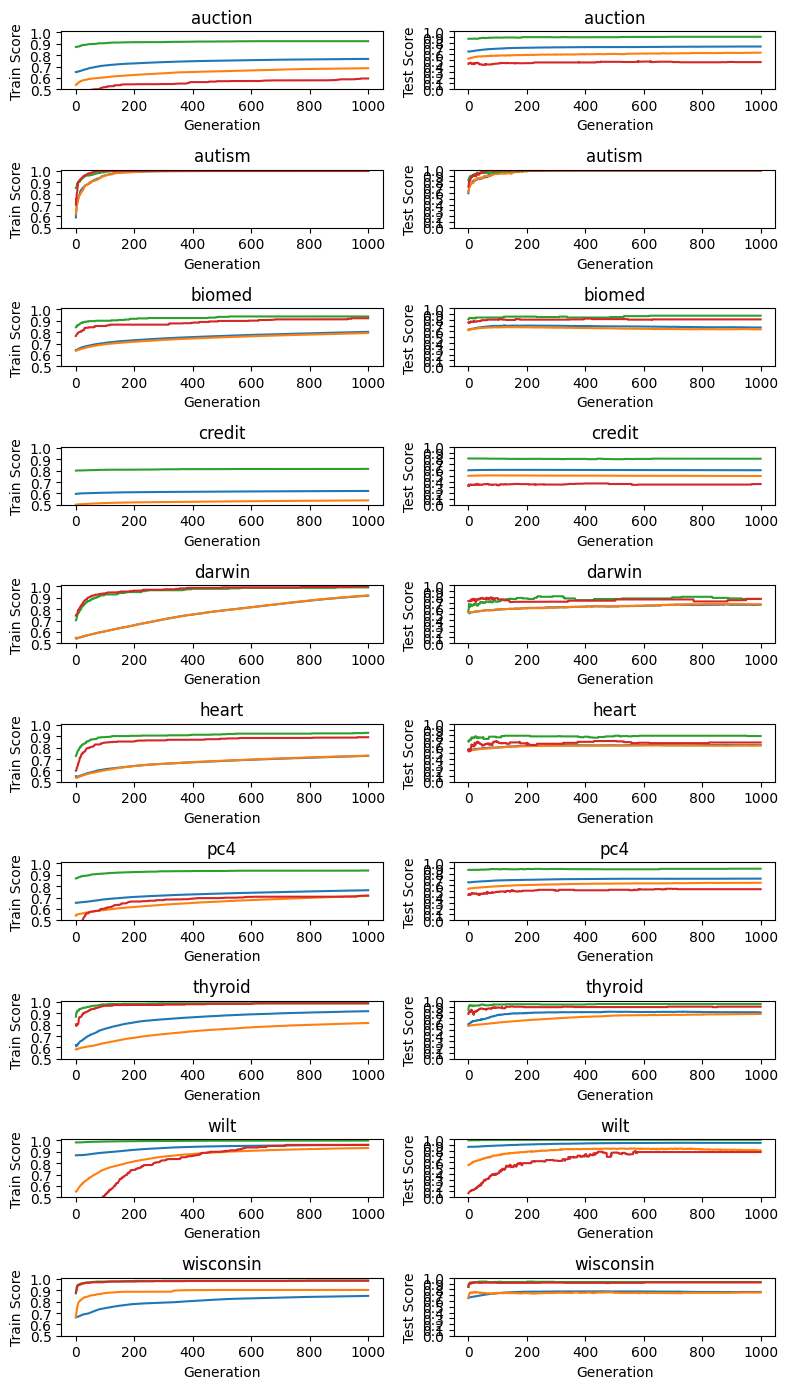

In [5]:
plot_performance_evolution_by_fitness_function(ana_fitness.best_config_logs)

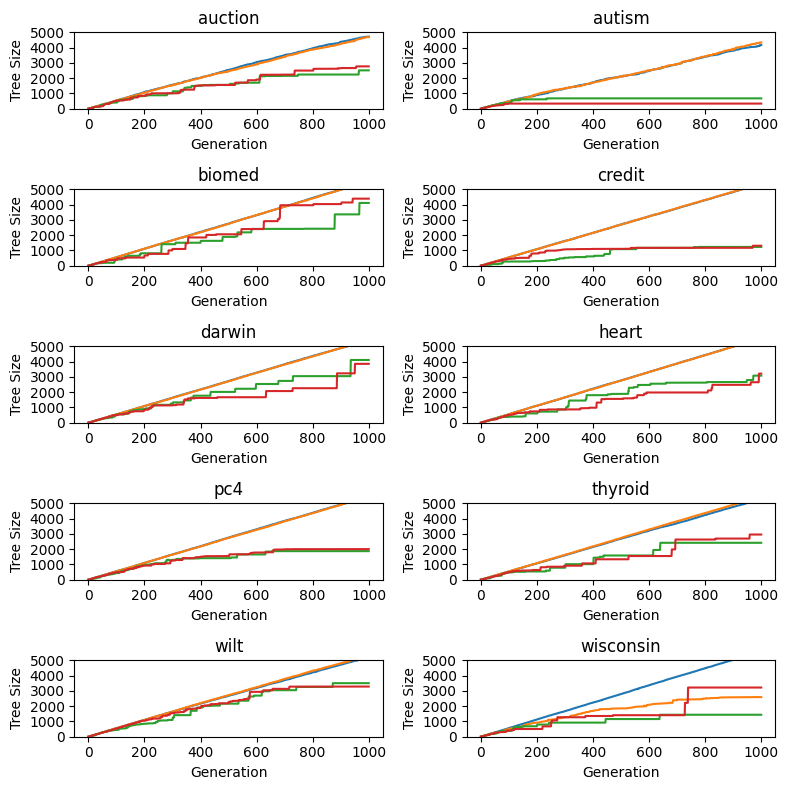

In [6]:
plot_tree_size_evolution_by_fitness_function(ana_fitness.best_config_logs)

In [7]:
ana_fitness.best_config_logs

,config_id,algorithm,dataset,seed,generation,elite_train_error,time,population_nodes,elite_test_error,elite_nodes,log_level,dataset_name,fitness_function
0,2,GSGP,auction,1,1,0.349713,0.031370,1680.0,0.350253,11,1,auction,sigmoid_rmse
1,2,GSGP,auction,1,2,0.349034,0.031768,1936.0,0.349714,9,1,auction,sigmoid_rmse
2,2,GSGP,auction,1,3,0.348922,0.036339,2566.0,0.348979,15,1,auction,sigmoid_rmse
3,2,GSGP,auction,1,4,0.348153,0.031371,2918.0,0.348125,29,1,auction,sigmoid_rmse
4,2,GSGP,auction,1,5,0.348133,0.035625,3416.0,0.347922,21,1,auction,sigmoid_rmse
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320275,14,GSGP,wisconsin,8,996,0.987179,0.039652,598386.0,0.900763,251,1,wisconsin,f1_score
320276,14,GSGP,wisconsin,8,997,0.987179,0.040050,599006.0,0.900763,251,1,wisconsin,f1_score
320277,14,GSGP,wisconsin,8,998,0.987179,0.043266,605394.0,0.900763,251,1,wisconsin,f1_score
320278,14,GSGP,wisconsin,8,999,0.987179,0.041895,605966.0,0.900763,251,1,wisconsin,f1_score


In [ ]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])

y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.7540696802366


(array([-1.11221482e+02,  6.75778400e+00, -2.38147002e-12, -2.35143849e-12,
        -2.31598074e-12, -2.37616871e-12, -2.35675368e-12, -2.34519348e-12,
        -2.34622044e-12, -2.35500508e-12, -2.35100828e-12, -6.48532698e+01]),
 127.96579076130251)

In [ ]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.773092758426989

In [ ]:
lr.coef_, lr.intercept_

(array([3718.96964286, -221.1308149 ,  505.3       , -140.4375    ,
          43.41875   ,  -20.55625   ,  254.4375    ,  -34.0125    ,
         287.1625    ,   68.83125   ,  449.0375    , -130.08625   ]),
 -147.57111970210258)

P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [ ]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.001754,0.018330
autism,0.838818,0.109952
biomed,0.493315,0.139655
caesarian,0.943190,0.722714
credit,0.910465,0.754382
darwin,0.137366,0.717290
facebook,0.636660,0.694887
landmines,0.031395,0.158601
student,0.507252,0.080934


Median Tree Size Table

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [ ]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,5.979925e-18,1.082121e-22
autism,1.879692e-34,4.236451e-37
biomed,1.601541e-10,3.061488e-23
caesarian,2.959930e-17,4.916322e-19
credit,5.504761e-19,9.416238e-17
darwin,8.928884e-25,1.456714e-46
facebook,9.506388e-15,2.801172e-11
landmines,4.660608e-20,2.617964e-15
student,1.204075e-16,4.044322e-20


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [ ]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014679,0.002033
autism,0.000001,0.000002
biomed,0.015151,0.003000
caesarian,0.000848,0.002219
credit,0.000782,0.008717
darwin,0.019247,0.000001
facebook,0.006183,0.063294
landmines,0.001234,0.008877
student,0.001197,0.007792
